# Python/OpenCV/Webcam Test Notebook
This notebook is a quick test to make sure that a few things are working in your system.  This test that you can grab images from a camera (hopefully you're using a laptop with a built-in webcam or have an external USB webcam -- if you don't then please let me know ASAP).



In [49]:
# This allows you to display/plot images, etc. within the notebook document
# (pylab includes matplotlib)
%pylab inline

import cv2 # This imports the OpenCV library/modele
import numpy as np # This imports numpy for subsequent ease of use

import os.path
import urllib.request
import time

Populating the interactive namespace from numpy and matplotlib


<br>

### Load and Display an Image
***
So that we're all working with the same image, we'll download one off the web.

In [50]:
IMG_URL = 'https://www.intel.com/content/dam/develop/external/us/en/images/expanding-possibilities-computer-vision-with-ai-wallpaper-780924.jpg'
LOCAL_FILE = 'vision_image.png'
urllib.request.urlretrieve(IMG_URL, LOCAL_FILE)
if os.path.exists(LOCAL_FILE):
    print(f'Successfully downloaded file: {LOCAL_FILE}')

Successfully downloaded file: vision_image.png


<br>

Now we'll use OpenCV to read the image and matplotlib to display it...

Displaying Image...


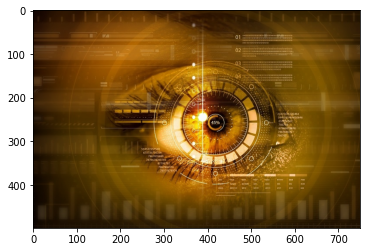

In [51]:
im = cv2.imread(LOCAL_FILE)
print('Displaying Image...')
imshow(im);

<br>

### Testing the Camera
***
Now we'll use the OpenCV library to grab a frame from our camera which we can then do various operations with.

In [52]:
# Create a Video Capture Device (device zero is the default which 
# would be the webcam if you're on a laptop)
cap = cv2.VideoCapture(0)

# Grab a few frames to make sure the exposure adjusts itself
for i in range (10):
    ret, frame = cap.read()
    time.sleep(0.1)

# Now grab the actual frame that we're going to use
ret, frame = cap.read()

if ret == True:
    print('Successfully grabbed a frame from the camera!')
else:
    print('ERROR: cap.read() returned {}'.format(frame))

Successfully grabbed a frame from the camera!


<br>

Now we'll display the frame.

[[[210 211 202]
  [210 211 202]
  [208 209 200]
  ...
  [185 176 168]
  [185 176 168]
  [185 176 168]]

 [[212 212 203]
  [210 211 202]
  [209 210 201]
  ...
  [183 176 168]
  [183 176 168]
  [183 176 168]]

 [[212 212 203]
  [212 212 203]
  [208 212 202]
  ...
  [183 176 168]
  [183 176 168]
  [182 175 167]]

 ...

 [[ 99  88  85]
  [ 99  88  85]
  [ 93  88  84]
  ...
  [ 20  10  19]
  [ 22   9  20]
  [ 21   8  19]]

 [[ 98  81  72]
  [101  83  75]
  [ 94  86  76]
  ...
  [ 18   1  18]
  [ 16   3  16]
  [ 15   1  15]]

 [[106  84  74]
  [109  88  78]
  [105  93  81]
  ...
  [ 15   0  19]
  [ 14   0  17]
  [ 13   0  16]]]


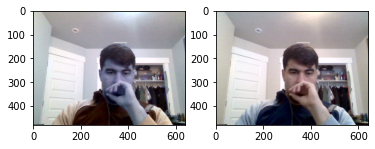

In [53]:
print(frame)
subplot(1,2,1)
imshow(frame)

subplot(1,2,2)
imshow(frame[:,:,::-1])

# release/free up the capture object, we're done with it
cap.release()

#### QUESTION -- What's the difference between the two images above???

<br>

### Test for SIFT
***
We'll use the image that we downloaded off the web and extract SIFT descriptors from it.

In [54]:
SIFT = cv2.SIFT_create()

f,d = SIFT.detectAndCompute(im,None)
if d.shape[1] == 128:
    print( f'Found {d.shape[0]} SIFT feature points!' )

Found 1147 SIFT feature points!
